# Introduction
The California Housing dataset is a classic dataset for regression tasks, widely used for benchmarking regression algorithms. This dataset contains information collected from the 1990 U.S. Census, with each row representing a block group. 

# Objectives
The primary objective is to predict the median house value for California districts based on numerical features such as median income, average number of rooms, and geographical coordinates using various Machine Learning and Deep Learning techniques.

#### Other objectives are:
- Perform Exploratory Data Analysis (EDA) to understand the dataset and visualize important features.
- Evaluate and compare the performance of ML and DL models to determine the best performing model in predicting the housing price.

# Evaluation metrics
The primary metrics were Root Mean Squared Error (RMSE) and R-squared (R²) to provide a clear indication of model accuracy and fit. Additionally, Mean Absolute Error (MAE) and Mean Squared Error (MSE) were utilized during the evaluation of deep learning models to add depth to the analysis, helping to capture different aspects of prediction errors and offering a more nuanced understanding of model performance. 

#### Root Mean Squared Error (RMSE)
RMSE is a widely used metric for regression tasks that measures the average magnitude of the errors between predicted values and actual values. It is calculated as the square root of the average of the squared differences between predicted and actual values. RMSE is particularly useful because it provides a clear measure of how well the model is performing in the same units as the target variable. Lower RMSE values indicate better model performance. 

#### R-squared (R²)
R², also known as the coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model performance. An R² value close to 1 means that a large proportion of the variance in the target variable is explained by the model, while a value close to 0 indicates that the model does not explain much of the variance.

#### Mean Absolute Error (MAE)
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is calculated as the average of the absolute differences between predicted and actual values. MAE provides an intuitive measure of error and is less sensitive to outliers compared to RMSE. MAE was used during the evaluation of deep learning models to offer additional insight into the model's performance by providing a straightforward interpretation of the average prediction error.

#### Mean Squared Error (MSE)
MSE calculates the average of the squared differences between predicted and actual values. It provides a measure of the quality of an estimator by penalizing larger errors more heavily than MAE. MSE was used during the evaluation of deep learning models to help understand the average squared error and to compare against RMSE.

# Past related work
House price prediction has been a prominent area of research, with various studies employing a range of machine learning and deep learning techniques. These studies not only focus on traditional house attributes but also integrate heterogeneous data such as street-view or satellite images to enhance prediction accuracy. Here, I discuss relevant works that align with the methodologies used in this project, particularly focusing on Random Forest, Convolutional Neural Networks (CNN), and Artificial Neural Networks (ANN).

Several studies have demonstrated the effectiveness of machine learning methods in house price prediction. Afonso et al. proposed a model combining Random Forest with a Recurrent Neural Network (RNN) to predict house prices using a Brazilian house dataset.[1]  Mu et al. utilized Support Vector Machine (SVM) and least squares SVM to predict house prices, outperforming partial least squares regression.[2]

In the realm of deep learning, several studies have explored advanced neural network architectures. Yu et al. developed a hybrid deep learning model combining LSTM and CNN to forecast secondhand house prices in Beijing, demonstrating superior performance over traditional autoregressive models.[3] Ge proposed a framework integrating a Graph Convolutional Network (GCN) with LSTM to capture temporal-spatial features, economic factors, and community characteristics, enhancing house price predictions.[4]

In summary, the literature highlights the effectiveness of both machine learning and deep learning models in predicting house prices. 

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the California Housing dataset from sklearn
housing = fetch_california_housing(as_frame=True)
df = housing.frame 

In [4]:
df.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

# Exploratory Data Analysis
EDA involves inspecting the dataset, handling missing values, visualizing distributions, and understanding relationships between features. 

Steps include:
- Visualizing the distribution of Median House Value.
- Analyzing correlations between features.
- Plotting geographical distributions of house values.
- Plotting histogram and identifying features with high skewness and kurtosis
- Adjust features with capping its values to handle outliers

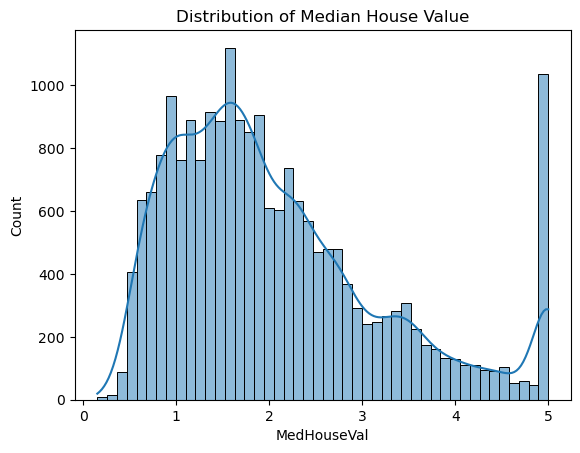

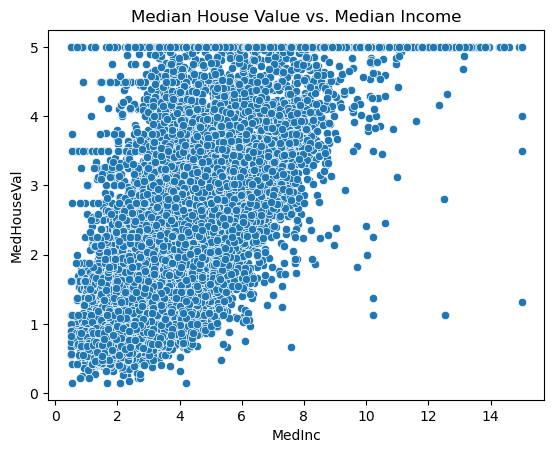

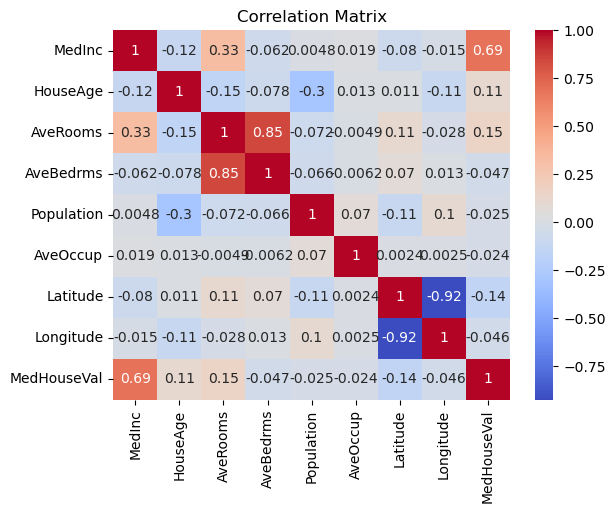

In [6]:
# histograph on distribution of median house value
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.show()

# scatter plot on showing any relationship between median house value vs median income
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal')
plt.title('Median House Value vs. Median Income')
plt.show()

# Correlation Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Evaluation of Distribution of Median House Value
There are high counts for house values of 1 and 2 in hundreds of thousands dollars and the counts decreases into house values of 3 and 4, however the count for house values of 5 is as much as for the house value of 1 and 2, this possibly means that that is the possible cap for house prices in the dataset.

### Evaluation of Median House Value vs Median Income
Scatterplot showed a positive correlation between median house value and median income. As median income increases, the median house value tends to increase as well. The relationship is not perfectly linear, but it still shows a strong trend. However, for median house value of 5, there is no clear correlation with median income as the values stretches across a wide range of median income, indicating that there are other factos that may influence housing price from that price range.

### Correlation matrix evaluation
The matrix generally showed little to none correlation between features, except for median house value against median income which has been covered. There is a slight correlation in average room in the house against median income, and a strong correlation between average bedrooms and average rooms, which is pretty obvious due to bedrooms being a subset of rooms.

### Plotting geospatial distribution of median house values using scatter plot

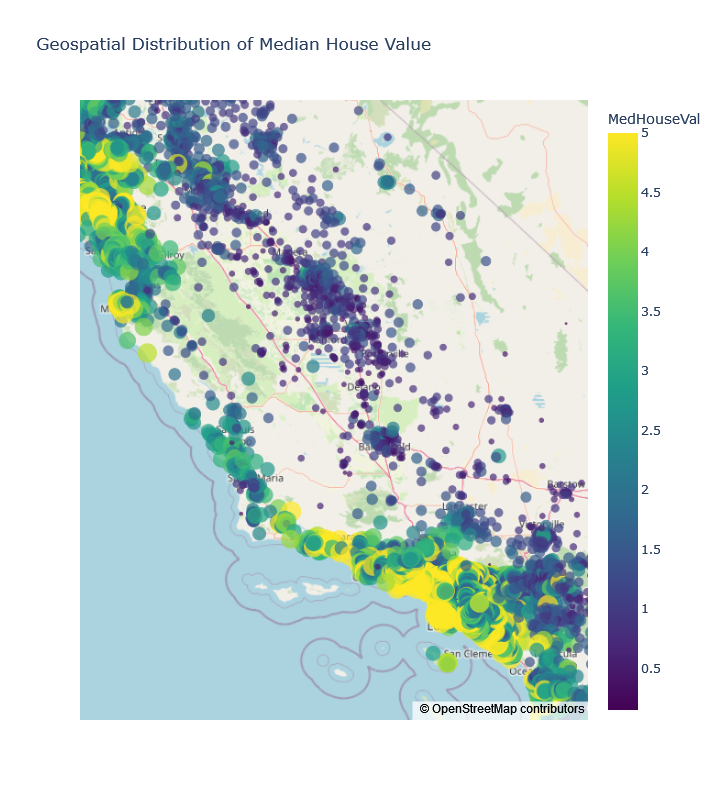

In [8]:
%matplotlib inline
import plotly.express as px

# Create an interactive scatter plot map
fig = px.scatter_mapbox(
    df,
    lat='Latitude',
    lon='Longitude',
    color='MedHouseVal',
    color_continuous_scale=px.colors.sequential.Viridis,
    size='MedHouseVal',
    size_max=15,
    zoom=6,
    mapbox_style='open-street-map',
    title='Geospatial Distribution of Median House Value'
)

# Update the layout
fig.update_layout(
    width=1200,
    height=800,
    title='Geospatial Distribution of Median House Value'
)

fig.show()

### Geospatial distribution observation
From the scatter plot, it is evident that houses nearer towards the coast have generally higher value and houses further from the coast. Usually due to a higher demand in coastal properties that drives up housing prices as they are often more desireable due to their scenic views, and close proximity to beaches.

Another observation is that houses in the major cities such as San Francisco, San Jose, Los Angeles and San Diego have higher median housing value. This is due to the economic opportunities and good infrastructure making it an attractive place to live, and the high demand for housing in these cities combined with limited supply, leads to this increased property prices.

# Data Preparation
### Plot histogram for all features 
This is to visualize its distributions to observe and identify any skewed or high kurtosis features, and adjust them accordingly as part of data preparation.

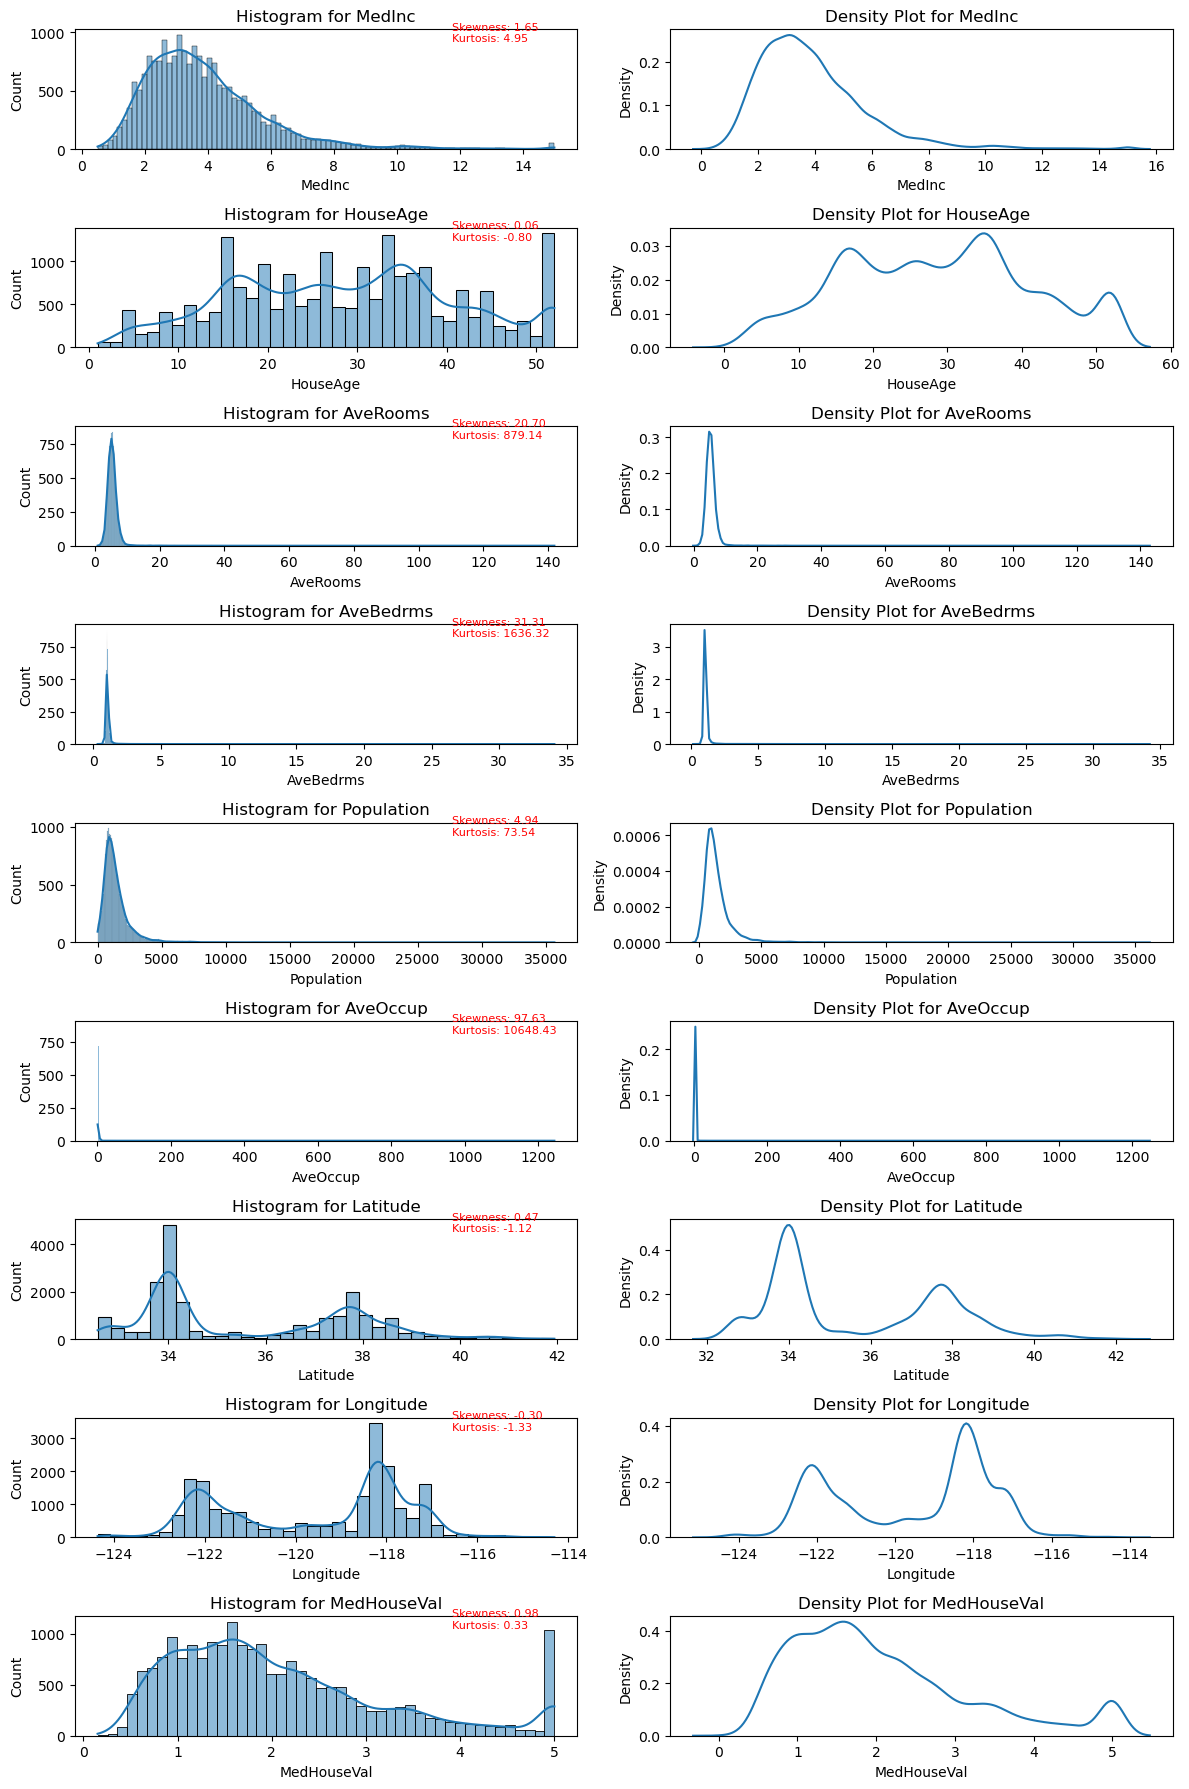

In [10]:
from scipy.stats import skew, kurtosis

numeric_columns = df.select_dtypes(include='number')
fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=2, figsize=(12, 2 * len(numeric_columns.columns)))

for i, col in enumerate(numeric_columns.columns):
    # Plot histogram for all the columns
    sns.histplot(numeric_columns[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {col}')

    # Plot density plot for all the columns
    sns.kdeplot(numeric_columns[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Density Plot for {col}')

    # Print skewness and kurtosis
    skew_val = skew(numeric_columns[col])
    kurtosis_val = kurtosis(numeric_columns[col])
    axes[i, 0].text(0.75, 0.9, f'Skewness: {skew_val:.2f}\nKurtosis: {kurtosis_val:.2f}', transform=axes[i, 0].transAxes, fontsize=8, color='red')

# Adjust layout
plt.tight_layout()
plt.show()


### Histogram evaluation
From the histograms, it is evident that AveRooms, Avebedrms and AveOccup have extremely high value of kurtosis as the distributions are heavily biased towards one side of the data. These 3 features are selected to apply data processing to better balance the dataset before machine and deep learning model implementation.

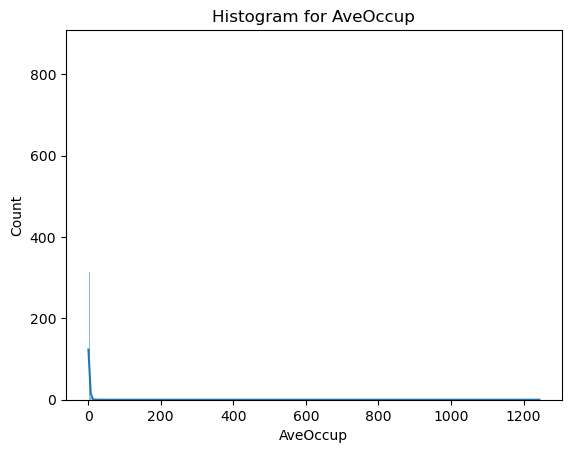

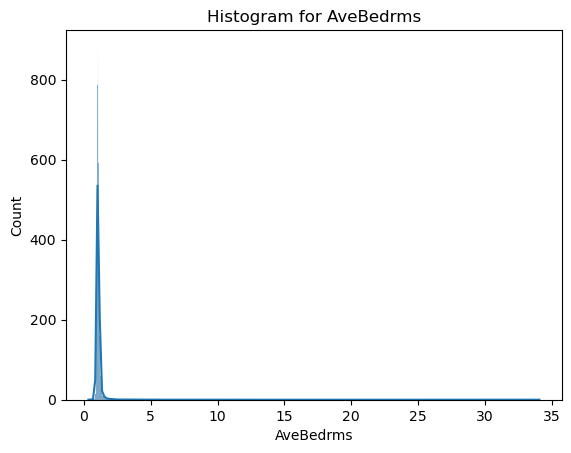

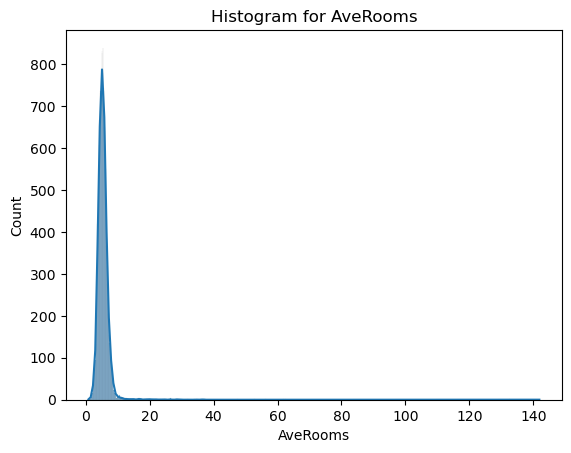

In [12]:
# Visualize the distribution of those with high kurtosis
sns.histplot(df['AveOccup'], kde=True)
plt.title('Histogram for AveOccup')
plt.show()

sns.histplot(df['AveBedrms'], kde=True)
plt.title('Histogram for AveBedrms')
plt.show()

sns.histplot(df['AveRooms'], kde=True)
plt.title('Histogram for AveRooms')
plt.show()

### Data preparation
 By identifying the percentile to cap off the values, which in this case with the help of the basic satistics from the features, 99.5th percentile are chosen as the maximum cap for the features

In [14]:
# Check basic statistics
print(df['AveOccup'].describe())
print(df['AveBedrms'].describe())
print(df['AveRooms'].describe())

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64
count    20640.000000
mean         1.096675
std          0.473911
min          0.333333
25%          1.006079
50%          1.048780
75%          1.099526
max         34.066667
Name: AveBedrms, dtype: float64
count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64


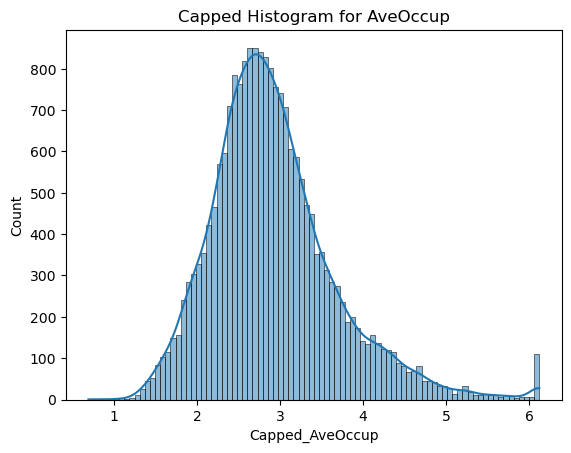

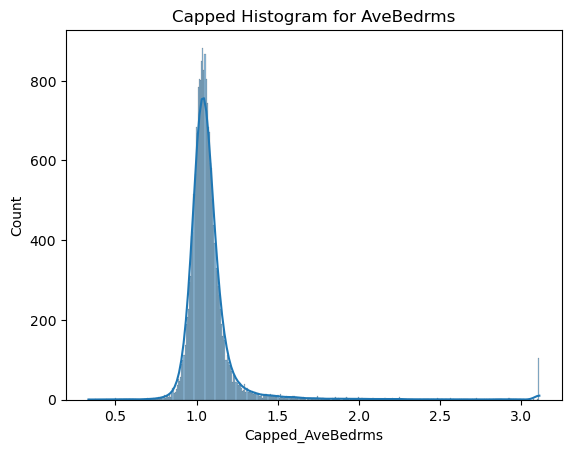

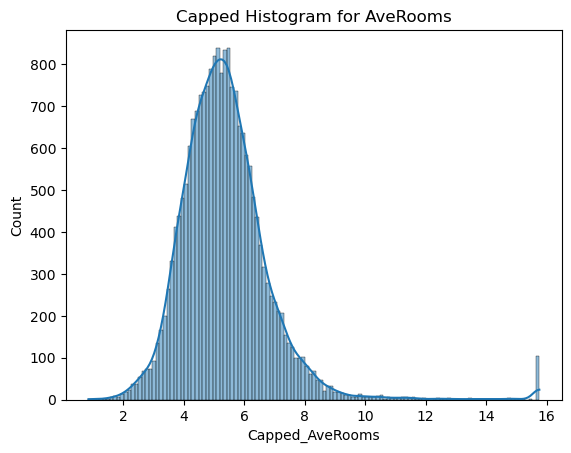

In [15]:
# Cap the values at the 99.5th percentile
cap_value_occup = df['AveOccup'].quantile(0.995)
cap_value_bedrms = df['AveBedrms'].quantile(0.995)
cap_value_rooms = df['AveRooms'].quantile(0.995)

df['Capped_AveOccup'] = np.where(df['AveOccup'] > cap_value_occup, cap_value_occup, df['AveOccup'])
df['Capped_AveBedrms'] = np.where(df['AveBedrms'] > cap_value_bedrms, cap_value_bedrms, df['AveBedrms'])
df['Capped_AveRooms'] = np.where(df['AveRooms'] > cap_value_rooms, cap_value_rooms, df['AveRooms'])

# Visualize capped distributions
sns.histplot(df['Capped_AveOccup'], kde=True)
plt.title('Capped Histogram for AveOccup')
plt.show()

sns.histplot(df['Capped_AveBedrms'], kde=True)
plt.title('Capped Histogram for AveBedrms')
plt.show()

sns.histplot(df['Capped_AveRooms'], kde=True)
plt.title('Capped Histogram for AveRooms')
plt.show()


# Machine learning implementation
### Polynomial Regression base model
Polynomial regression extends linear regression by considering polynomial relationship between the features and the target variable. This helps to capture non-linear patterns in the data.

Different ranges of degree will be explored and the degree with the best result is selected.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
features = ['Longitude', 'Latitude', 'Capped_AveOccup', 'Capped_AveBedrms', 'Capped_AveRooms', 'HouseAge', 'MedInc']
X = df[features]
y = df['MedHouseVal']


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to store the results for each degree
results = {}

# Loop through degrees 1 to 5
for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    # Train a polynomial regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[degree] = {'RMSE': rmse, 'R2': r2}
    
    # Print the results for each degree
    print(f'Degree: {degree}')
    print(f'Polynomial Regression - RMSE: {rmse}')
    print(f'Polynomial Regression - R2: {r2}')
    print('-' * 30)

# Find the degree with the best RMSE and R2 score
best_degree_rmse = min(results, key=lambda x: results[x]['RMSE'])
best_degree_r2 = max(results, key=lambda x: results[x]['R2'])

print(f'Best Degree by RMSE: {best_degree_rmse}, RMSE: {results[best_degree_rmse]["RMSE"]}')
print(f'Best Degree by R2: {best_degree_r2}, R2: {results[best_degree_r2]["R2"]}')


Degree: 1
Polynomial Regression - RMSE: 0.6837732858797153
Polynomial Regression - R2: 0.6432061179019247
------------------------------
Degree: 2
Polynomial Regression - RMSE: 0.618152525276497
Polynomial Regression - R2: 0.70840207076522
------------------------------
Degree: 3
Polynomial Regression - RMSE: 0.5980348480613152
Polynomial Regression - R2: 0.7270732378712591
------------------------------
Degree: 4
Polynomial Regression - RMSE: 0.6616191743608814
Polynomial Regression - R2: 0.665951669173086
------------------------------
Degree: 5
Polynomial Regression - RMSE: 1.223715962379065
Polynomial Regression - R2: -0.14275831549288376
------------------------------
Best Degree by RMSE: 3, RMSE: 0.5980348480613152
Best Degree by R2: 3, R2: 0.7270732378712591


Polynomial Regression Degree 3 - RMSE: 0.5980348480613152
Polynomial Regression Degree 3 - R2: 0.7270732378712591


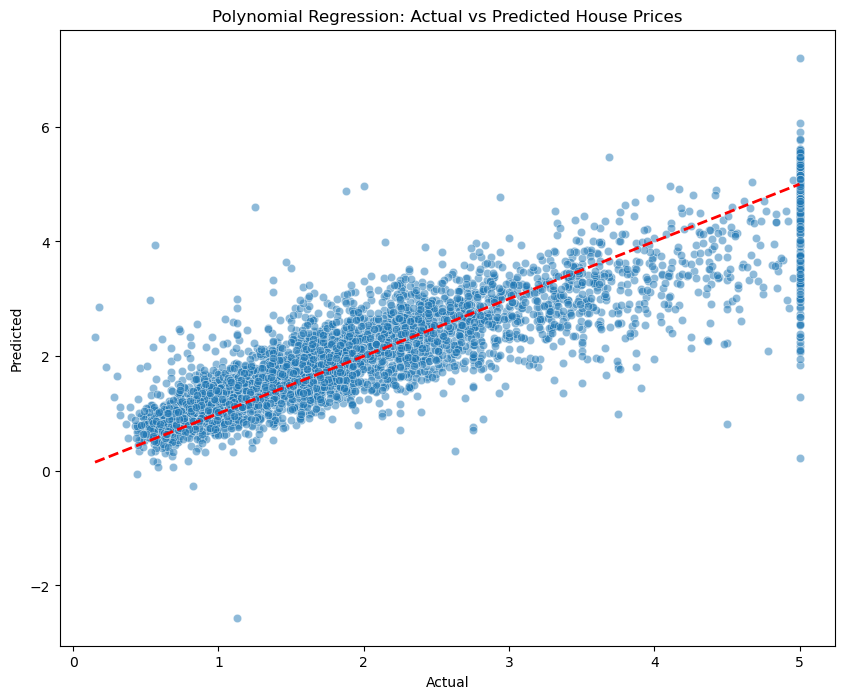

In [19]:
# After finding the best degree
degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred))
r2_poly = r2_score(y_test, y_pred)

print(f'Polynomial Regression Degree {degree} - RMSE: {rmse_poly}')
print(f'Polynomial Regression Degree {degree} - R2: {r2_poly}')

# Visualize the predictions
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression: Actual vs Predicted House Prices')
plt.show()

## Further implementation of different Machine learning model
### Ridge Regression model
Ridge regression is a regularized version of linear regression that adds a penalty for larger coefficients. This helps prevent overfitting by shrinking the coefficients, making the model more generalizable.

### Lasso Regression model
Lasso regression is another regularization technique that adds a penalty equal to the absolute value of the magnitude of coefficients. It performs feature selection by shrinking some coefficients to zero.

### ElasticNet regression model
ElasticNet combines both Ridge and Lasso regularizations. It balances between the two penalties and is useful when there are multiple correlated features.

In [21]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Define the models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_elasticnet = elasticnet_model.predict(X_test)

# Evaluate the models
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print(f'Ridge Regression - RMSE: {rmse_ridge}, R2: {r2_ridge}')
print(f'Lasso Regression - RMSE: {rmse_lasso}, R2: {r2_lasso}')
print(f'ElasticNet Regression - RMSE: {rmse_elasticnet}, R2: {r2_elasticnet}')


C:\Users\Tom_N\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.087e+03, tolerance: 2.207e+00



Ridge Regression - RMSE: 0.5959070118121826, R2: 0.7290119553335022
Lasso Regression - RMSE: 0.6209680754951018, R2: 0.7057396910529994
ElasticNet Regression - RMSE: 0.6216318941658089, R2: 0.7051102226398722


C:\Users\Tom_N\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.082e+03, tolerance: 2.207e+00



### Random Forest
Random Forest is an ensemble learning method that builds multiple decision trees and merges their predictions. It improves accuracy and reduces overfitting by averaging the results of various trees

### Gradient Boosting
Gradient Boosting is another ensemble technique that builds trees sequentially. Each tree corrects the errors of the previous ones, leading to a strong predictive model.

In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Random Forest - RMSE: {rmse_rf}, R2: {r2_rf}')
print(f'Gradient Boosting - RMSE: {rmse_gb}, R2: {r2_gb}')


Random Forest - RMSE: 0.523090866967994, R2: 0.7911918647927443
Gradient Boosting - RMSE: 0.5379971873147866, R2: 0.7791216495271813


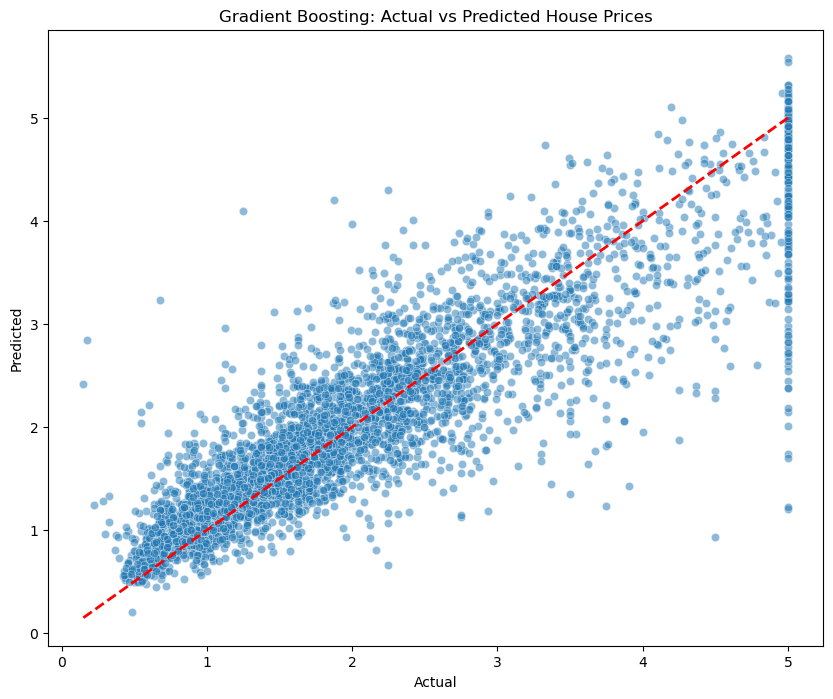

In [24]:
# Gradient Boosting model visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs Predicted House Prices')
plt.show()


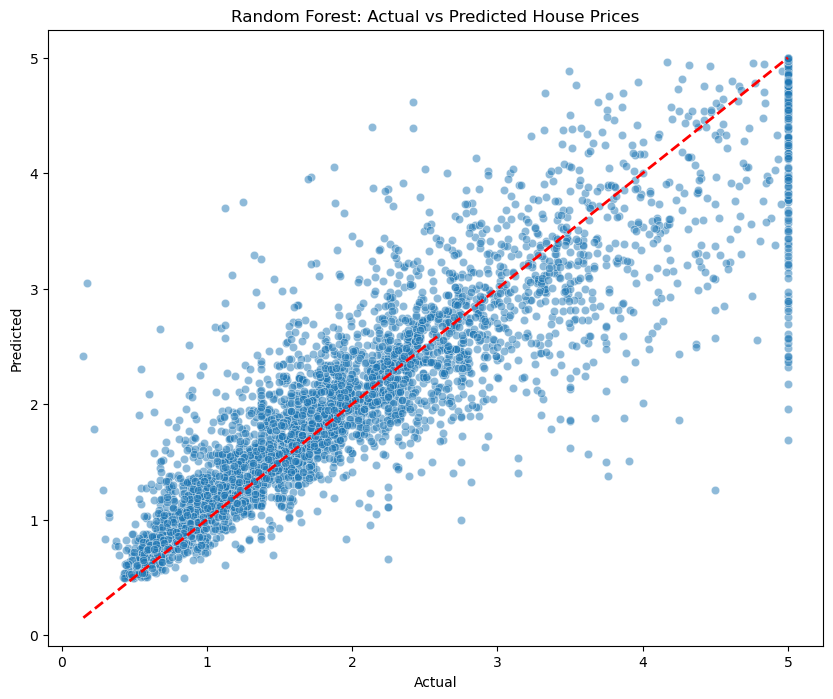

In [25]:
# Random Forest model visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted House Prices')
plt.show()


# Deep Learning models
### Artificial Neural Network (ANN)
ANNs are computational models inspired by the human brain, consisting of interconnected layers of neurons. They are powerful for capturing complex patterns in data. In this case, there are 3 dense layers with ReLU activations and 2 dropout layers.

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Input
from tensorflow.keras.optimizers import Adam

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Build the artificial neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2)

# Evaluate model
mse, mae = model.evaluate(X_test, y_test, verbose=2)
print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')

Epoch 1/100
413/413 - 2s - 5ms/step - loss: 0.6888 - mae: 0.5894 - val_loss: 0.4191 - val_mae: 0.4509
Epoch 2/100
413/413 - 1s - 1ms/step - loss: 0.4222 - mae: 0.4622 - val_loss: 0.3858 - val_mae: 0.4290
Epoch 3/100
413/413 - 1s - 1ms/step - loss: 0.3926 - mae: 0.4462 - val_loss: 0.3918 - val_mae: 0.4316
Epoch 4/100
413/413 - 1s - 2ms/step - loss: 0.3802 - mae: 0.4374 - val_loss: 0.3945 - val_mae: 0.4261
Epoch 5/100
413/413 - 1s - 2ms/step - loss: 0.3635 - mae: 0.4260 - val_loss: 0.3632 - val_mae: 0.4130
Epoch 6/100
413/413 - 1s - 2ms/step - loss: 0.3575 - mae: 0.4206 - val_loss: 0.3652 - val_mae: 0.4122
Epoch 7/100
413/413 - 1s - 2ms/step - loss: 0.3443 - mae: 0.4119 - val_loss: 0.3438 - val_mae: 0.3983
Epoch 8/100
413/413 - 1s - 2ms/step - loss: 0.3357 - mae: 0.4056 - val_loss: 0.3491 - val_mae: 0.4068
Epoch 9/100
413/413 - 1s - 1ms/step - loss: 0.3369 - mae: 0.4061 - val_loss: 0.3429 - val_mae: 0.4160
Epoch 10/100
413/413 - 1s - 2ms/step - loss: 0.3368 - mae: 0.4054 - val_loss: 0.33

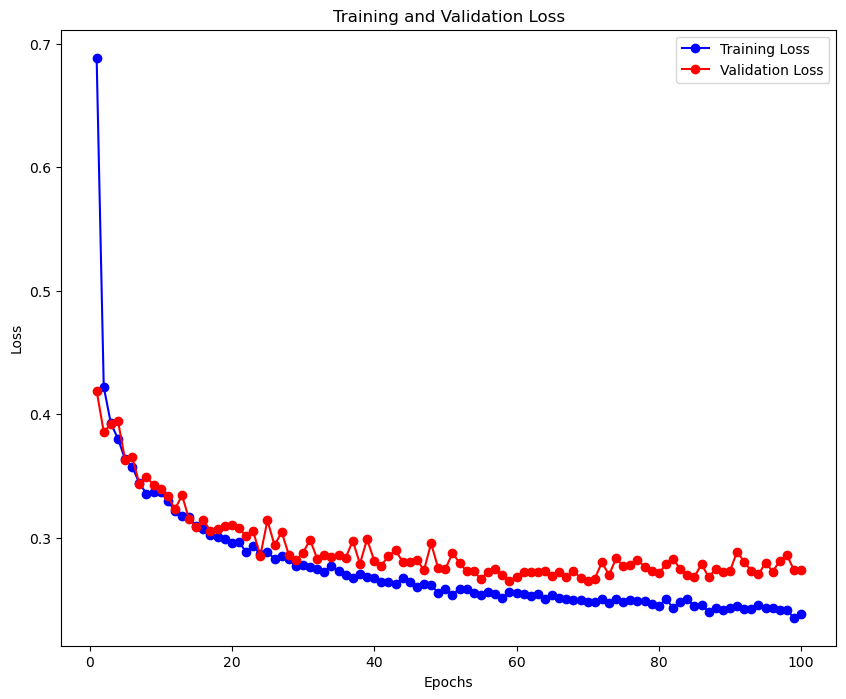

In [29]:
# Extract loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 8))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# Make predictions
y_pred_nn = model.predict(X_test).flatten()

# Evaluate the model with RMSE and R2
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network - RMSE: {rmse_nn}')
print(f'Neural Network - R2: {r2_nn}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
Neural Network - RMSE: 0.5241034745919881
Neural Network - R2: 0.790382654087022


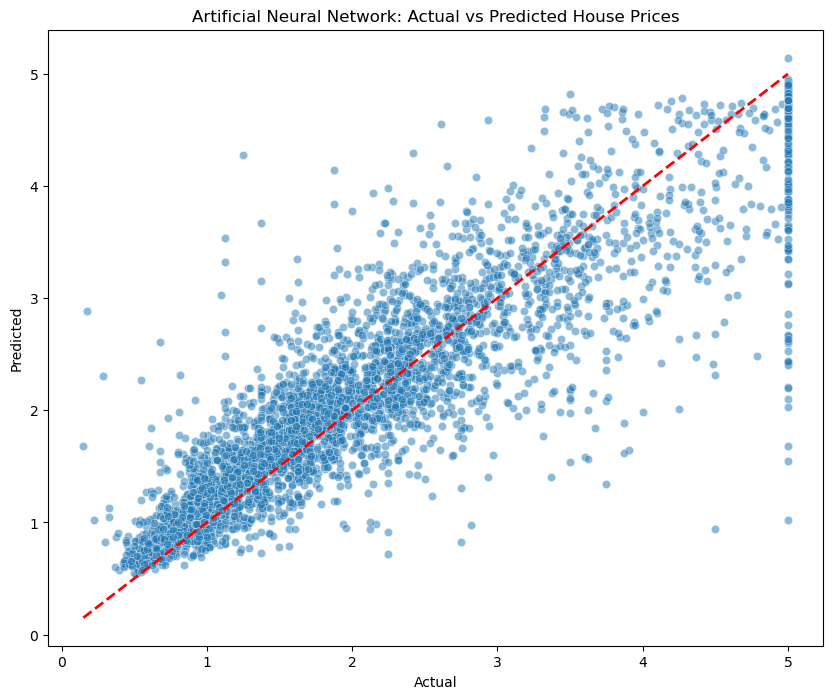

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Artificial Neural Network: Actual vs Predicted House Prices')
plt.show()

### Convolutional Neural Network (CNN)
CNN uses convolutional layers to automaticall learn spatial hierarchies of features, and the CNN model have a Conv1D layer, a MaxPooling1D layer, a flatten layer, 2 dense layer and 2 dropout layer.

In [33]:
from tensorflow.keras.layers import Conv1D, Flatten , MaxPooling1D

# Reshape the data for Conv1D
X_scaled_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_cnn, y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1) 
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 5, 128)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,729 (163.00 KB)

 Trainable params: 41,729 (163.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2)

# Evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=2)
print(f' MSE: {mse}')
print(f' MAE: {mae}')

Epoch 1/100
413/413 - 2s - 6ms/step - loss: 0.8173 - mae: 0.6615 - val_loss: 0.5939 - val_mae: 0.5517
Epoch 2/100
413/413 - 1s - 3ms/step - loss: 0.5337 - mae: 0.5374 - val_loss: 0.4741 - val_mae: 0.5002
Epoch 3/100
413/413 - 1s - 3ms/step - loss: 0.4905 - mae: 0.5073 - val_loss: 0.4380 - val_mae: 0.4673
Epoch 4/100
413/413 - 1s - 2ms/step - loss: 0.4554 - mae: 0.4823 - val_loss: 0.4262 - val_mae: 0.4612
Epoch 5/100
413/413 - 1s - 3ms/step - loss: 0.4403 - mae: 0.4740 - val_loss: 0.4263 - val_mae: 0.4755
Epoch 6/100
413/413 - 1s - 3ms/step - loss: 0.4418 - mae: 0.4732 - val_loss: 0.4456 - val_mae: 0.4578
Epoch 7/100
413/413 - 1s - 3ms/step - loss: 0.4308 - mae: 0.4660 - val_loss: 0.4223 - val_mae: 0.4607
Epoch 8/100
413/413 - 1s - 3ms/step - loss: 0.4260 - mae: 0.4608 - val_loss: 0.4062 - val_mae: 0.4444
Epoch 9/100
413/413 - 1s - 2ms/step - loss: 0.4210 - mae: 0.4623 - val_loss: 0.3991 - val_mae: 0.4519
Epoch 10/100
413/413 - 1s - 3ms/step - loss: 0.4098 - mae: 0.4533 - val_loss: 0.40

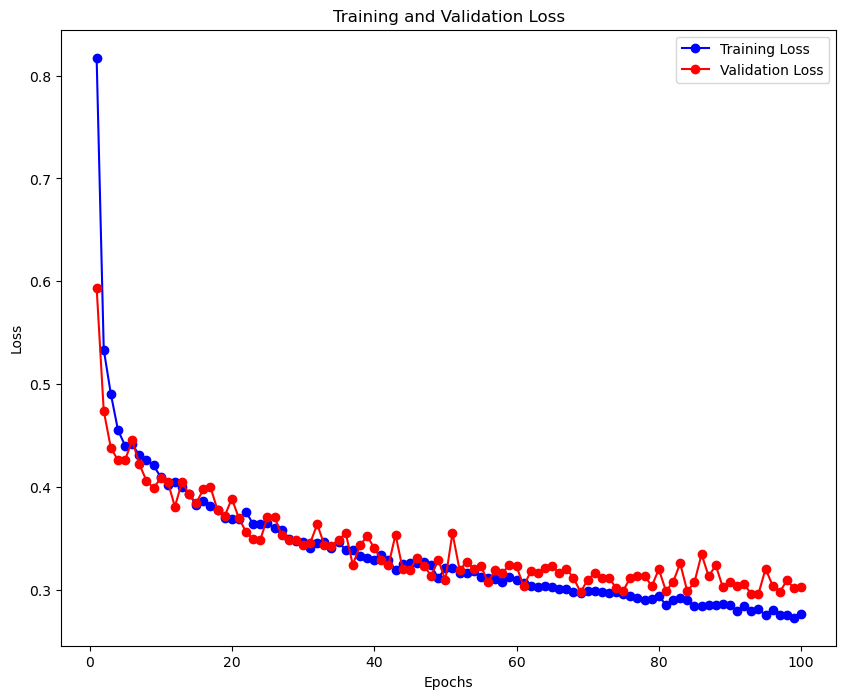

In [35]:
# Extract loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 8))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# Make predictions
y_pred_cnn = model.predict(X_test).flatten()

# Evaluate the model with RMSE and R2
rmse_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
r2_cnn = r2_score(y_test, y_pred_cnn)

print(f'CNN - RMSE: {rmse_cnn}')
print(f'CNN - R2: {r2_cnn}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
CNN - RMSE: 0.5507833983506006
CNN - R2: 0.7684979598461911


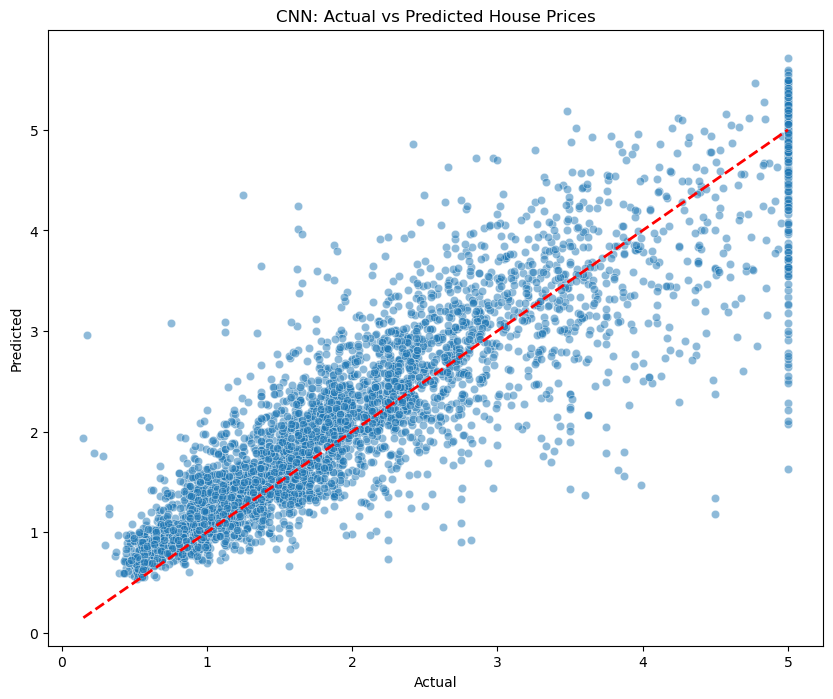

In [37]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_cnn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CNN: Actual vs Predicted House Prices')
plt.show()

# Comparative analysis
### Plotting bar chart for comparison between the models' performance

In [39]:
# Make a dataframe for all the models' result
results = {
    'Model': ['Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 
              'Random Forest', 'Gradient Boosting', 'Artificial NN', 'CNN'],
    'RMSE': [rmse_poly, rmse_ridge, rmse_lasso, rmse_elasticnet, rmse_rf, rmse_gb, rmse_nn, rmse_cnn],
    'R2': [r2_poly, r2_ridge, r2_lasso, r2_elasticnet, r2_rf, r2_gb, r2_nn, r2_cnn]
}

results_df = pd.DataFrame(results)
print(results_df)

                   Model      RMSE        R2
0  Polynomial Regression  0.598035  0.727073
1       Ridge Regression  0.595907  0.729012
2       Lasso Regression  0.620968  0.705740
3  ElasticNet Regression  0.621632  0.705110
4          Random Forest  0.523091  0.791192
5      Gradient Boosting  0.537997  0.779122
6          Artificial NN  0.524103  0.790383
7                    CNN  0.550783  0.768498


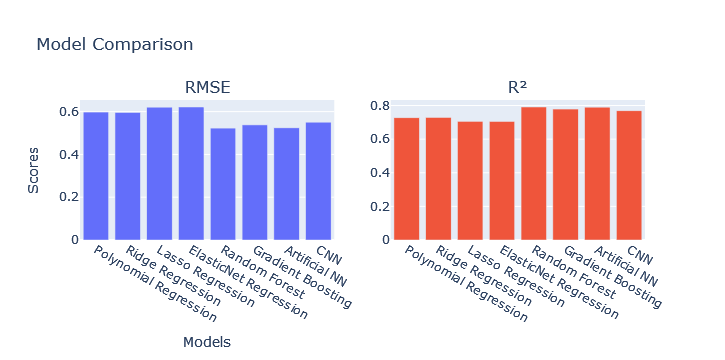

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=("RMSE", "R²"))

# Add RMSE bar chart
fig.add_trace(
    go.Bar(x=results_df['Model'], y=results_df['RMSE'], name='RMSE'),
    row=1, col=1
)

# Add R² bar chart
fig.add_trace(
    go.Bar(x=results_df['Model'], y=results_df['R2'], name='R²'),
    row=1, col=2
)

fig.update_layout(
    title_text="Model Comparison",
    xaxis_title="Models",
    yaxis_title="Scores",
    showlegend=False
)

fig.show()

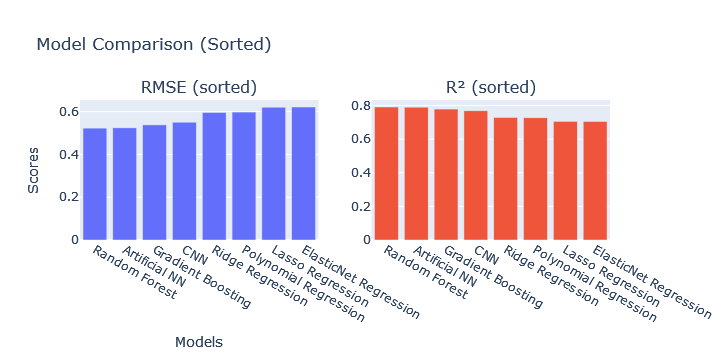

In [41]:
# Sort by RMSE in ascending order
results_df_rmse_sorted = results_df.sort_values(by='RMSE', ascending=True)

# Sort by R² in descending order
results_df_r2_sorted = results_df.sort_values(by='R2', ascending=False)

fig = make_subplots(rows=1, cols=2, subplot_titles=("RMSE (sorted)", "R² (sorted)"))

# Add RMSE bar chart
fig.add_trace(
    go.Bar(x=results_df_rmse_sorted['Model'], y=results_df_rmse_sorted['RMSE'], name='RMSE'),
    row=1, col=1
)

# Add R² bar chart
fig.add_trace(
    go.Bar(x=results_df_r2_sorted['Model'], y=results_df_r2_sorted['R2'], name='R²'),
    row=1, col=2
)

fig.update_layout(
    title_text="Model Comparison (Sorted)",
    xaxis_title="Models",
    yaxis_title="Scores",
    showlegend=False
)
fig.show()

# Evaluation of models' performance
For the RMSE value, the ANN model has the least score of 0.441 followed closely by the Random Forest model of 0.450, as the lower score highlight the better performance by these two model.

For R² value, there is a similarity in results as the ANN model performed the best followed by the Random Forest model with the value of 0.801 and 0.793 respectively.

This shows that ANN achieved the best performance with the lowest RMSE and highest R² for deep learning models, and Random Forest achieved the best performanced for machine learning models.

Generally, the regularized regression models like Ridge, Lasso and ElasticNet performed worst among the models in terms of its RMSE and R² value.

# Conclusion
In this project, I explored various machine learning and deep learning models to predict house prices using the California Housing dataset. By comparing different algorithms,I achieved my aim to identify the most effective model in predicting the median house value in California. The results also showed that ensemble methods and deep learning models proved to have performed better over traditional regression models with ANN and Random Forest showing the best performance. Further tuning of hyperparamters and experimentations with these models could yield an even better results. Do also take note that based on the dataset, the dataset is derived from year 1990 and this project was aimed to practice my machine learning and deep learning techniques and knowledges as the dataset are outdated and the housing price might not reflect on the current housing price.

# References
1- B. Afonso, L. Melo, W. Oliveira, S. Sousa and L. Berton, "Housing prices prediction with a deep learning and random forest ensemble", Proc. Anais do 16th Encontro Nacional de Inteligência Artif. e Computacional, pp. 389-400, 2019.

2- J. Mu, F. Wu and A. Zhang, "Housing value forecasting based on machine learning methods", Abstract Appl. Anal., vol. 2014, pp. 1-7, Aug. 2014.

3- L. Yu, C. Jiao, H. Xin, Y. Wang and K. Wang, "Prediction on housing price based on deep learning", Int. J. Comput. Inf. Eng., vol. 12, no. 2, pp. 90-99, 2018.

4- C. Ge, "A LSTM and graph CNN combined network for community house price forecasting", Proc. 20th IEEE Int. Conf. Mobile Data Manage. (MDM), pp. 393-394, Jun. 2019.